# LAMPIRAN



Notebook ini merupakan projek yang digunakan untuk mengklasifikasi dataSet car Stanford yang terdiri dari 16.185 gambar dengan 196 jenis mobil. pada notebook ini, hanya mengambil data 528 data mobil yang dikelompokkan dalam 3 kelas, yaitu Acura, Aston Martin, dan Cadillac yang digabung menjadi 1.

In [1]:
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm

from skimage import io, transform
from keras.utils import to_categorical
import time
from sklearn.model_selection import train_test_split
seed = 333
np.random.seed(seed)

Using TensorFlow backend.


# Preparing Data

In [3]:
import os
#path path/direktori
img_dir = "../input/dataset-mobil/dataset_mobil/dataset_mobil/"

#melihat list direktori
print(os.listdir(img_dir))

['Acura', 'Cadillac', 'Aston Martin']


In [4]:
#digunakan untuk load data
def load_data(img_dir):
    X = []
    y = []
    labels = []
    idx = 0
    for i,folder_name in enumerate(os.listdir(img_dir)):
        if folder_name in ( "Acura","Aston Martin","Cadillac"):
            labels.append(folder_name)
            for file_name in tqdm(os.listdir(f'{img_dir}/{folder_name}')):
                if file_name.endswith('jpg'):
                    im = cv2.imread(f'{img_dir}/{folder_name}/{file_name}')
                    if im is not None:
                        im = cv2.resize(im, (100, 100))
                        X.append(im)
                        y.append(idx)
        idx+=1
    idx = 2

    X = np.asarray(X)
    y = np.asarray(y)
    labels = np.asarray(labels)
    return X,y,labels


In [6]:
#menjalankan perintah load data
X,y,labels = load_data(img_dir)

100%|██████████| 157/157 [00:01<00:00, 131.33it/s]


In [8]:
labels

array(['Acura', 'Cadillac', 'Aston Martin'], dtype='<U12')

In [9]:
#fix y
y = y.reshape(-1,1)

In [10]:
for i,_ in enumerate(y):
    if y[i] == 1:
        y[i]=0
    elif y[i] == 2:
        pass
    else:
        y[i]=1

In [11]:
#memisahkan data menjadi training dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)


pengambilan Dimensi Dataset (shape). Hal ini dilakukan untuk mendapatkan gambaran singkat tentang berapa banyak baris dan atribut data

In [12]:
train_img = X_train
train_labels = y_train
test_img = X_test
test_labels = y_test
train_img.shape, train_labels.shape, test_img.shape, test_labels.shape

((422, 100, 100, 3), (422, 1), (106, 100, 100, 3), (106, 1))

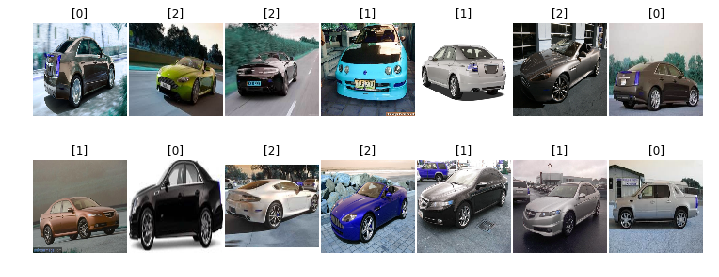

In [13]:
#melihat sampel dataset, diambil dengan rendom
rand_14 = np.random.randint(0, train_img.shape[0],14)
sample_img = train_img[rand_14]
sample_labels = train_labels[rand_14]
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),gridspec_kw={'wspace':0.03, 'hspace':0.01})
for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_img[image_index])
        ax[r,c].set_title('%s' % sample_labels[image_index])
plt.show()
plt.close()

# Preprocessing data

In [14]:
#one-hot-encode the labels
num_classes = len(labels)
train_labels = to_categorical(train_labels,num_classes)
test_labels = to_categorical(test_labels,num_classes)
train_labels.shape, test_labels.shape

((422, 3), (106, 3))

In [15]:
# re-shape the images data
train_data = train_img
test_data = test_img
train_data.shape, test_data.shape

((422, 100, 100, 3), (106, 100, 100, 3))

In [16]:
# shuffle the training dataset & set aside val_perc % of rows as validation data
for _ in range(5): 
    indexes = np.random.permutation(len(train_data))

# randomly sorted!
train_data = train_data[indexes]
train_labels = train_labels[indexes]

# now we will set-aside val_perc% of the train_data/labels as cross-validation sets
val_perc = 0.10
val_count = int(val_perc * len(train_data))
print(val_count)

# first pick validation set
val_data = train_data[:val_count,:]
val_labels = train_labels[:val_count,:]

# leave rest in training set
train_data2 = train_data[val_count:,:]
train_labels2 = train_labels[val_count:,:]

train_data2.shape, train_labels2.shape, val_data.shape, val_labels.shape, test_data.shape, test_labels.shape

42


((380, 100, 100, 3),
 (380, 3),
 (42, 100, 100, 3),
 (42, 3),
 (106, 100, 100, 3),
 (106, 3))

In [17]:
# a utility function that plots the losses and accuracies for training & validation sets across our epochs
def show_plots(history):
    """ Useful function to view plot of loss values & accuracies across the various epochs """
    loss_vals = history['loss']
    val_loss_vals = history['val_loss']
    epochs = range(1, len(history['acc'])+1)
    
    f, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
    
    # plot losses on ax[0]
    ax[0].plot(epochs, loss_vals, color='navy',marker='o', linestyle=' ', label='Training Loss')
    ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
    ax[0].set_title('Training & Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc='best')
    ax[0].grid(True)
    
    # plot accuracies
    acc_vals = history['acc']
    val_acc_vals = history['val_acc']

    ax[1].plot(epochs, acc_vals, color='navy', marker='o', ls=' ', label='Training Accuracy')
    ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
    ax[1].set_title('Training & Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='best')
    ax[1].grid(True)
    
    plt.show()
    plt.close()
    
    # delete locals from heap before exiting
    del loss_vals, val_loss_vals, epochs, acc_vals, val_acc_vals

In [18]:
def print_time_taken(start_time, end_time):
    secs_elapsed = end_time - start_time
    
    SECS_PER_MIN = 60
    SECS_PER_HR  = 60 * SECS_PER_MIN
    
    hrs_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_HR)
    mins_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_MIN)
    
    if hrs_elapsed > 0:
        print('Time taken: %d hrs %d mins %d secs' % (hrs_elapsed, mins_elapsed, secs_elapsed))
    elif mins_elapsed > 0:
        print('Time taken: %d mins %d secs' % (mins_elapsed, secs_elapsed))
    elif secs_elapsed > 1:
        print('Time taken: %d secs' % (secs_elapsed))
    else:
        print('Time taken - less than 1 sec')

In [19]:
#create label comments from the results of testing
def get_commonname(idx):
    sciname = labels[idx][0]
    return {
        'Acura':'Acura',
        'Aston Martin':'Aston Martin',
        'Cadillac':'Cadillac'
    }[sciname]

# Proses Training Data

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


import numpy as np
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,Activation,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.datasets import mnist
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from PIL import Image

In [22]:
#data augmentation
datagen = ImageDataGenerator(
        rotation_range=30,
        zoom_range = 0.25,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [23]:
#create multiple cnn model for ensembling
#model 1
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (100, 100, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Conv2D(256, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

# use adam optimizer and categorical cross entropy cost
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 98, 98, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
__________

In [25]:
# after each epoch decrease learning rate by 0.95
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [26]:
# after each epoch decrease learning rate by 0.95
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

# train
epochs = 10
j=0
start_time = time.time()
history = model.fit_generator(datagen.flow(train_data2, train_labels2, batch_size=64),epochs = epochs, steps_per_epoch = train_data2.shape[0]/64,validation_data = (val_data, val_labels), callbacks=[annealer], verbose=1)
end_time = time.time()
print_time_taken(start_time, end_time)


print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(j+1,epochs,history.history['acc'][epochs-1],history.history['val_acc'][epochs-1]))

Epoch 1/10
6/5 [==============================] - 28s 5s/step - loss: 1.9969 - acc: 0.3841 - val_loss: 4.5619 - val_acc: 0.3571
Epoch 2/10
6/5 [==============================] - 25s 4s/step - loss: 1.8756 - acc: 0.4107 - val_loss: 4.2918 - val_acc: 0.4524
Epoch 3/10
6/5 [==============================] - 25s 4s/step - loss: 1.7218 - acc: 0.5000 - val_loss: 4.5311 - val_acc: 0.3810
Epoch 4/10
6/5 [==============================] - 25s 4s/step - loss: 1.5272 - acc: 0.4457 - val_loss: 4.4975 - val_acc: 0.3095
Epoch 5/10
6/5 [==============================] - 25s 4s/step - loss: 1.4704 - acc: 0.4607 - val_loss: 4.4856 - val_acc: 0.4286
Epoch 6/10
6/5 [==============================] - 25s 4s/step - loss: 1.3977 - acc: 0.4785 - val_loss: 4.0913 - val_acc: 0.3333
Epoch 7/10
6/5 [==============================] - 25s 4s/step - loss: 1.4308 - acc: 0.4471 - val_loss: 2.7055 - val_acc: 0.4048
Epoch 8/10
6/5 [==============================] - 25s 4s/step - loss: 1.2182 - acc: 0.5052 - val_loss: 2

# Plotting 

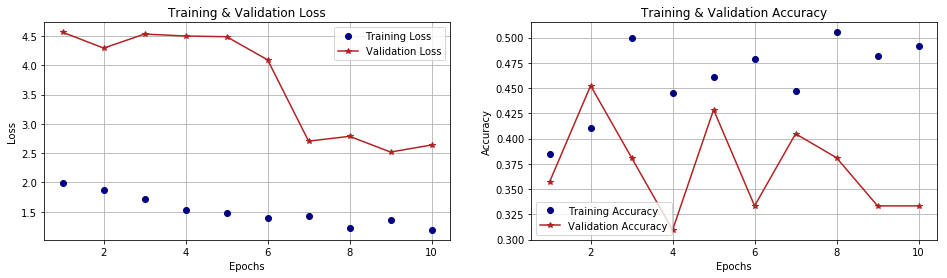

In [27]:
show_plots(history.history)

In [28]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))
#print(accuracy_score(y_test, y_pred))

106/106 [==============================] - 2s 16ms/step
Test loss: 2.5218 accuracy: 0.4434


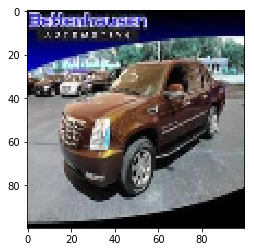

actual: Acura
predicted: Acura


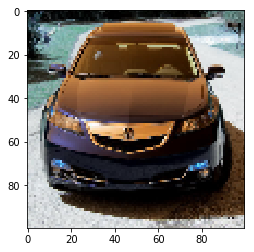

actual: Cadillac
predicted: Cadillac


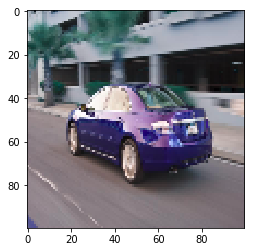

actual: Cadillac
predicted: Acura


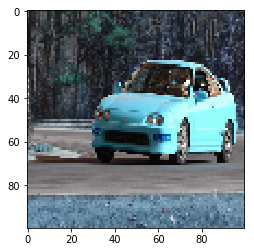

actual: Cadillac
predicted: Aston Martin


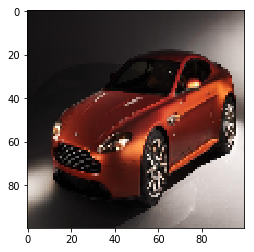

actual: Aston Martin
predicted: Cadillac


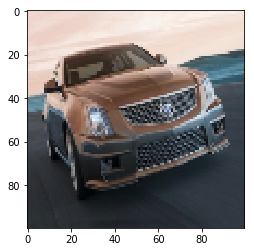

actual: Acura
predicted: Acura


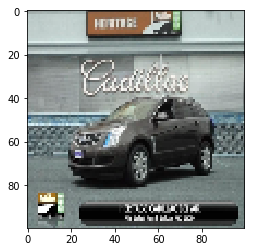

actual: Acura
predicted: Aston Martin


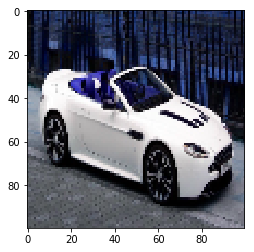

actual: Aston Martin
predicted: Cadillac


In [32]:
im_list = [10,20,30,40,50,90,100,105]
for i in im_list:
#     i = 1000  #index from test data to be used, change this other value to see a different image
    img = test_data[i]
    plt.imshow(img)
    plt.show()
    pred = model.predict_classes(img.reshape(-1,100,100,3))
    actual =  test_labels[i]
    print(f'actual: {get_commonname(actual)}')
    print(f'predicted: {get_commonname(pred)}')

In [33]:
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = model.to_json()


with open("model_3.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model_3.h5")